Arthur Clavier / Charles Deliège

# Final Project

### INFO OF DATASET...!!

The Dataset is named as "Online News Popularity Data Set" This summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity). Link of the dataset :- https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

Importing basic packages

In [1487]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset

In [1488]:
DATADIR=r'C:\Users\charl\Documents\A4 ESILV\Python_data_analysis\Projet\OnlineNewsPopularity'
df = pd.read_csv('OnlineNewsPopularity.csv')
df2=df
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [1489]:
df.shape

(39644, 61)

In [1490]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [1491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [1492]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [1493]:
df = df.drop(['url','timedelta'], axis=1)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


As it's said in the relevent papers, the dataset has already been cleaned in matter of Nan and Null values, lets check

In [1494]:
number_zero=df.isnull().sum().sum()
number_Nan=df.isna().sum().sum()
number_zero,number_Nan


(0, 0)

'n_tokens_content' describes the number of words in an article, this shouldn't be zero, otherwise empty articles that are actually not interesting would be included in the prediction, so we remove them

In [1495]:
drop_content=df[df['n_tokens_content']==0].index
drop_title=df[df['n_tokens_title']==0].index
drop_content.size,drop_title.size

(1181, 0)

In [1496]:
df=df.drop(drop_content)
df.shape

(38463, 59)

## Outlier check

In [1497]:
num = df.select_dtypes(include = "number")

## 

Let's separate values that contains outliers from the other with only few possible values (binary columns)

##### Creation of low value number array

In [1498]:
low_number_of_value=[]
for col in num.columns:
    if np.abs(df[col].skew()) > 1 and df[col].nunique()<5:
        low_number_of_value.append(col)

low_number_of_value

['data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend']

In [1499]:
truely_continuous_value=[]
plt.figure(figsize=(20,20))
for col in num.columns:
    if np.abs(df[col].skew()) > 1 and df[col].nunique()>15:
        truely_continuous_value.append(col)        
truely_continuous_value

['n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_rate_negative_words',
 'min_positive_polarity',
 'max_negative_polarity',
 'abs_title_sentiment_polarity',
 'shares']

<Figure size 1440x1440 with 0 Axes>

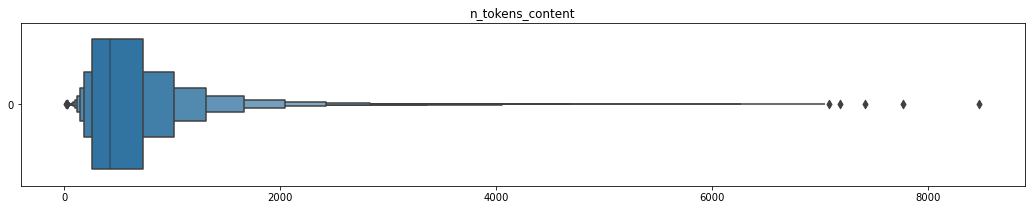

In [1500]:
plt.figure(figsize=(18,3))
sns.boxenplot(data=df.loc[:,truely_continuous_value[0]],orient='h')
plt.title(truely_continuous_value[0])
plt.show()

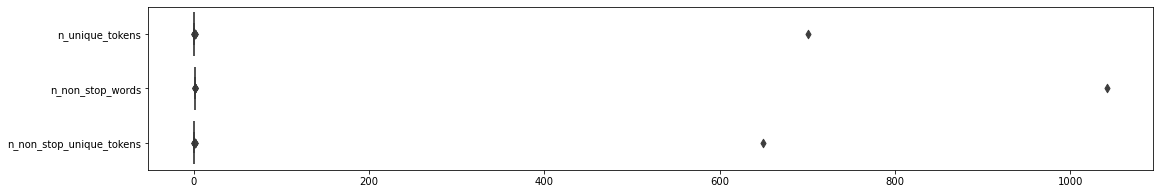

In [1501]:
plt.figure(figsize=(18,3))
sns.boxenplot(data=df.loc[:,truely_continuous_value[1:4]],orient='h')
plt.show()

Here for instance, we could remove outliers just like the code below but it would work only in this case, so we will see how to proceed on a global way later

In [1502]:
#df=df.drop(df[df['n_unique_tokens']>200].index)
#df=df.drop(df[df['n_non_stop_words']>200].index)
#df=df.drop(df[df['n_non_stop_unique_tokens']>200].index)

Thus, lets check outliers for the other variables

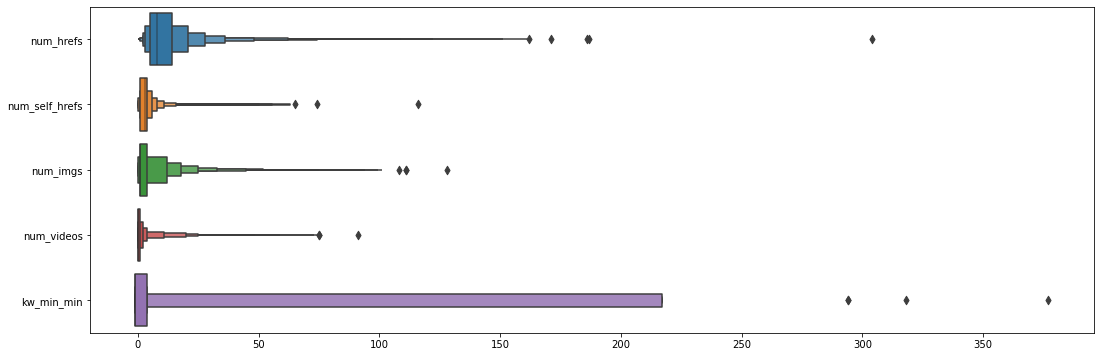

In [1503]:
plt.figure(figsize=(18,6))
sns.boxenplot(data=df.loc[:,truely_continuous_value[4:9]],orient='h')
plt.show()

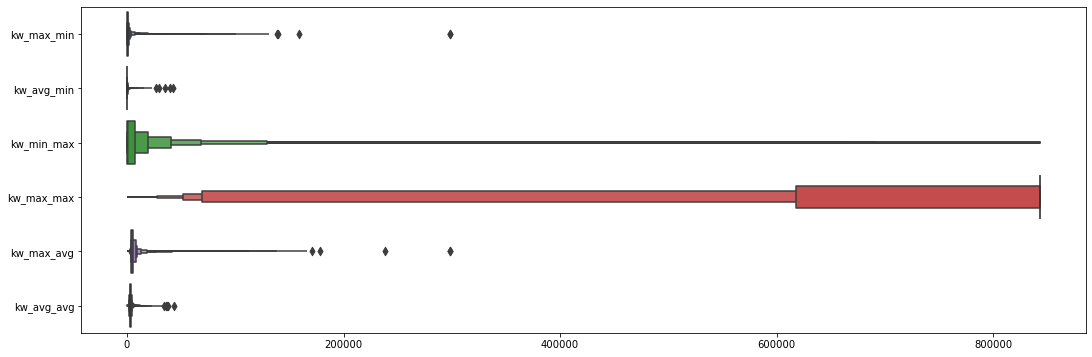

In [1504]:
plt.figure(figsize=(18,6))
sns.boxenplot(data=df.loc[:,truely_continuous_value[9:15]],orient='h')
plt.show()

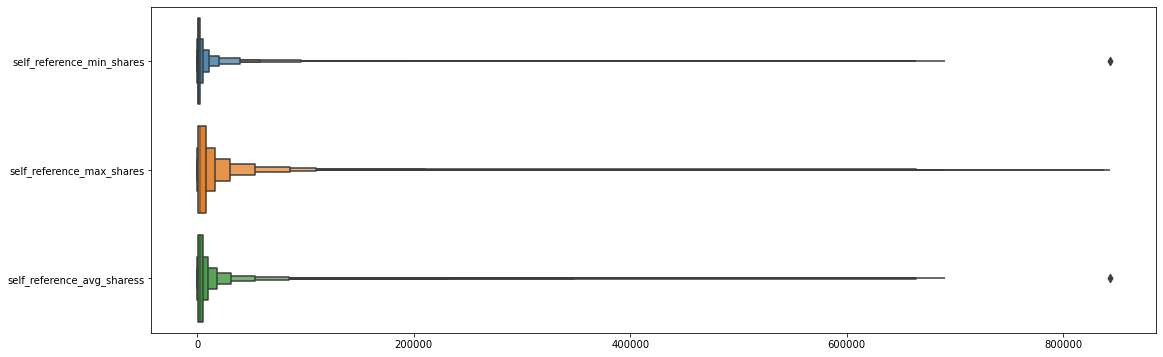

In [1505]:
plt.figure(figsize=(18,6))
sns.boxenplot(data=df.loc[:,truely_continuous_value[15:18]],orient='h')
plt.show()


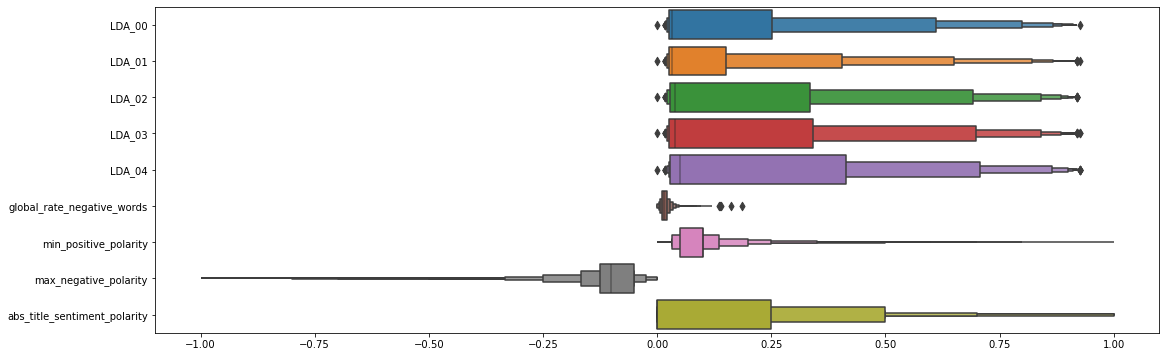

In [1506]:
plt.figure(figsize=(18,6))
sns.boxenplot(data=df.loc[:,truely_continuous_value[18:27]],orient='h')
plt.show()

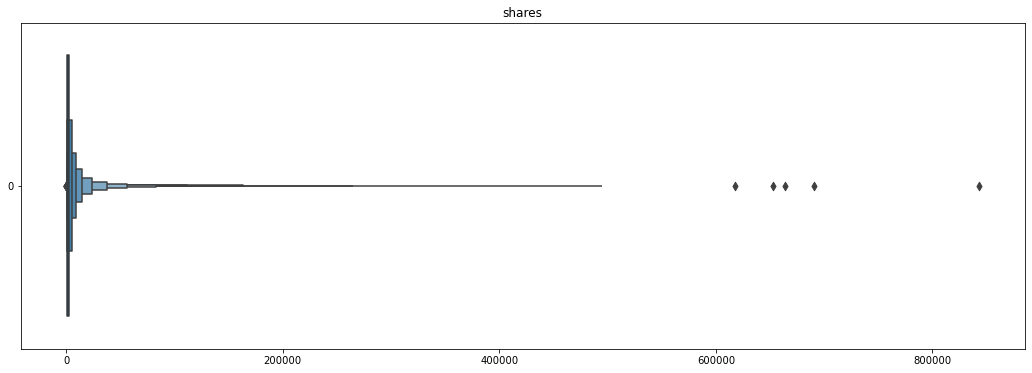

In [1507]:
plt.figure(figsize=(18,6))
sns.boxenplot(data=df.loc[:,truely_continuous_value[-1]],orient='h')
plt.title(truely_continuous_value[-1])
plt.show()

## Creation of the target variable

In [1508]:
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

We are going to create a new column in order to classify if an article is popular or not

In [1509]:
df['popularity']=df['shares'].apply(lambda x: 1 if x>=1400 else 0)
df['popularity'].value_counts()

1    20464
0    17999
Name: popularity, dtype: int64

We drop the column "shares" which is no longer useful

<AxesSubplot:xlabel='popularity', ylabel='count'>

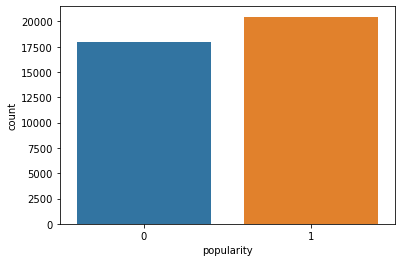

In [1510]:
data=df.drop(['shares'],axis=1)
sns.countplot(x='popularity',data=data)

## Correlation between popularity and the other variables


In [1511]:
data_type = data[low_number_of_value[:6]+['popularity']]
fig=px.bar(data_type.corr()['popularity'].index,
           x=data_type.corr()['popularity'].values,
           y=data_type.corr()['popularity'].index,
           color=[i for i in range(7)],
           orientation='h',
           width=1000,
           title="Correlation between the popularity and the subject of articles")
fig.update_layout(xaxis_title="Correlation with popularity", yaxis_title="Data type",xaxis_range=[-1,1],
                      yaxis_categoryorder = 'total ascending', uniformtext_mode='hide')

fig.show()


In [1512]:
week_days = data[low_number_of_value[6:]+['popularity']]
fig=px.bar(week_days.corr()['popularity'].index,
           x=week_days.corr()['popularity'].values,
           y=week_days.corr()['popularity'].index,
           color=[i for i in range(9)],
           orientation='h',
           width=1000,
           title="Correlation between week days and popularity")
fig.update_layout(xaxis_title="Correlation with popularity", yaxis_title="Week days",xaxis_range=[-0.2,0.2],
                      yaxis_categoryorder = 'total ascending', uniformtext_mode='hide')

fig.show()

In [1513]:
data[truely_continuous_value[:5]+['popularity']]

,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,popularity
0,219.0,0.663594,1.0,0.815385,4.0,0
1,255.0,0.604743,1.0,0.791946,3.0,0
2,211.0,0.575130,1.0,0.663866,3.0,1
3,531.0,0.503788,1.0,0.665635,9.0,0
4,1072.0,0.415646,1.0,0.540890,19.0,0
...,...,...,...,...,...,...
39639,346.0,0.529052,1.0,0.684783,9.0,1
39640,328.0,0.696296,1.0,0.885057,9.0,1
39641,442.0,0.516355,1.0,0.644128,24.0,1
39642,682.0,0.539493,1.0,0.692661,10.0,0


In [1514]:

tokens = data[truely_continuous_value[:4]+['popularity']]
fig=px.bar(tokens.corr()['popularity'].index,
           x=tokens.corr()['popularity'].values,
           y=tokens.corr()['popularity'].index,
           color=[i for i in range(5)],
           orientation='h',
           width=1000,
           title="Correlation between tokens and popularity")
fig.update_layout(xaxis_title="Correlation with popularity", yaxis_title="tokens",xaxis_range=[-0.2,0.2],
                      yaxis_categoryorder = 'total ascending', uniformtext_mode='hide')

fig.show()

In [1515]:
number_objectfs=data[truely_continuous_value[4:8]+['popularity']]
fig=px.bar(number_objectfs.corr()['popularity'].index,
           x=number_objectfs.corr()['popularity'].values,
           y=number_objectfs.corr()['popularity'].index,
           color=[i for i in range(5)],
           orientation='h',
           width=1000,
           title="Correlation between number of objects attached and popularity")
fig.update_layout(xaxis_title="Correlation with popularity", yaxis_title="Week days",xaxis_range=[-0.2,0.2],
                      yaxis_categoryorder = 'total ascending', uniformtext_mode='hide')

fig.show()

In [1516]:
number_objectfs=data[truely_continuous_value[8:15]+['popularity']]
fig=px.bar(number_objectfs.corr()['popularity'].index,
           x=number_objectfs.corr()['popularity'].values,
           y=number_objectfs.corr()['popularity'].index,
           color=[i for i in range(8)],
           orientation='h',
           width=1000,
           title="Correlation between key words and popularity")
fig.update_layout(xaxis_title="Correlation with popularity", yaxis_title="Key words",xaxis_range=[-0.2,0.2],
                      yaxis_categoryorder = 'total ascending', uniformtext_mode='hide')

fig.show()

In [1517]:
stat_shares=data[truely_continuous_value[15:18]+['popularity']]
fig=px.bar(stat_shares.corr()['popularity'].index,
           x=stat_shares.corr()['popularity'].values,
           y=stat_shares.corr()['popularity'].index,
           color=[i for i in range(4)],
           orientation='h',
           width=1000,
           title="Correlation between share reference stats and popularity")
fig.update_layout(xaxis_title="Correlation with popularity", yaxis_title="share reference stats",xaxis_range=[-0.2,0.2],
                      yaxis_categoryorder = 'total ascending', uniformtext_mode='hide')

fig.show()

In [1518]:
LDA=data[truely_continuous_value[18:23]+['popularity']]
fig=px.bar(LDA.corr()['popularity'].index,
            x=LDA.corr()['popularity'].values,
            y=LDA.corr()['popularity'].index,
            color=[i for i in range(6)],
            orientation='h',
            width=1000,
            title="Correlation between LDA's and popularity")
fig.update_layout(xaxis_title="Correlation with popularity", yaxis_title="LDA",xaxis_range=[-0.2,0.2],
                    yaxis_categoryorder = 'total ascending', uniformtext_mode='hide')

In [1519]:
polarity=data[truely_continuous_value[23:26]+['popularity']]
fig=px.bar(polarity.corr()['popularity'].index,
           x=polarity.corr()['popularity'].values,
           y=polarity.corr()['popularity'].index,
           color=[i for i in range(4)],
           orientation='h',
           width=1000,
           title="Correlation between polarity and popularity")
fig.update_layout(xaxis_title="Correlation with popularity", yaxis_title="polarity",xaxis_range=[-0.2,0.2],
                      yaxis_categoryorder = 'total ascending', uniformtext_mode='hide')

Top 10 more correlated variables with the target variable

In [1520]:
top_corr=data.corr()['popularity'].abs().sort_values(ascending=False).head(11)
fig=px.bar(top_corr.index,
           x=top_corr.values,
           y=top_corr.index,
           color=[i for i in range(11)],
           orientation='h',
           width=1000,
           title="Top 10 correlation with popularity")
fig.update_layout(xaxis_title="Correlation with popularity", yaxis_title="variables",xaxis_range=[-0.2,0.2],
                      yaxis_categoryorder = 'total ascending', uniformtext_mode='hide')
fig.show()

## Data spilt & Outlier removal

We split the data of the first dataset on which we will predict the popularity : the whole dataset, without the outliers

But we will also apply the same models on several subsets of the dataset 

In [1521]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

y = data['popularity']
X = data.drop(columns="popularity")

outliers = (X.apply(zscore)<3).all(axis=1)
X = X[outliers]
y = y[outliers]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We could have remove outliers this way (below), but we chose safer and easier way to do it

In [1522]:
#for col in truely_continuous_value:
 #   q1 = df[col].quantile(0.03)
 #   q3 = df[col].quantile(0.97)
 #   iqr = q3 - q1
 #   df=df.drop(df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)].index)
#
#df.shape

In [1523]:
knn_acc = []
dt_acc = []
rf_acc = []
ada_acc = []

## Application of models

In this section, we will fit 4 differents models :

- Knn
- Decision Tree
- Random Forest
- Ada Boost

In [1524]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_acc.append(metrics.accuracy_score(y_test, y_pred_knn))
print('Knn accuracy :', metrics.accuracy_score(y_test, y_pred_knn))

Knn accuracy : 0.5610169491525424


In [1525]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_acc.append(metrics.accuracy_score(y_test, y_pred_dt))
print('Decision Tree accuracy :', metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree accuracy : 0.5838983050847457


In [1526]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_acc.append(metrics.accuracy_score(y_test, y_pred_rf))
print('RandomForest accuracy :', metrics.accuracy_score(y_test, y_pred_rf))

RandomForest accuracy : 0.6328389830508474


In [1527]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

ada_acc.append(metrics.accuracy_score(y_test, y_pred_ada))
print('Ada Boost accuracy :',metrics.accuracy_score(y_test, y_pred_ada))

Ada Boost accuracy : 0.6665254237288135


## Variation of hyper parameters

In [1528]:
temp = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    temp.append(metrics.accuracy_score(y_test, y_pred_knn))
    print('k =',i,':', metrics.accuracy_score(y_test, y_pred_knn))

k = 1 : 0.548728813559322
k = 2 : 0.549364406779661
k = 3 : 0.5610169491525424
k = 4 : 0.561864406779661
k = 5 : 0.5754237288135593
k = 6 : 0.5669491525423729
k = 7 : 0.5641949152542373
k = 8 : 0.5584745762711865
k = 9 : 0.5667372881355932
k = 10 : 0.5663135593220339
k = 11 : 0.5733050847457627
k = 12 : 0.5680084745762712
k = 13 : 0.565677966101695
k = 14 : 0.5652542372881356
k = 15 : 0.5718220338983051
k = 16 : 0.5677966101694916
k = 17 : 0.5658898305084745
k = 18 : 0.5671610169491526
k = 19 : 0.5671610169491526


Text(0.5, 1.0, 'Accuracy of KNN for different K')

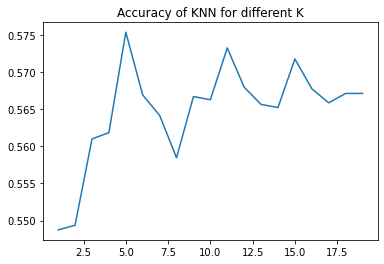

In [1529]:
sns.lineplot(x=[i for i in range(1,20)], y=temp)
plt.title('Accuracy of KNN for different K')

In [1530]:
temp = []
for i in range(1,20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=0)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    temp.append(metrics.accuracy_score(y_test, y_pred_dt))
    print('max_depth =',i,':', metrics.accuracy_score(y_test, y_pred_dt))

max_depth = 1 : 0.6016949152542372
max_depth = 2 : 0.6271186440677966
max_depth = 3 : 0.6345338983050848
max_depth = 4 : 0.6383474576271186
max_depth = 5 : 0.6432203389830509
max_depth = 6 : 0.6286016949152542
max_depth = 7 : 0.6385593220338983
max_depth = 8 : 0.6317796610169492
max_depth = 9 : 0.6239406779661016
max_depth = 10 : 0.6258474576271187
max_depth = 11 : 0.6169491525423729
max_depth = 12 : 0.611228813559322
max_depth = 13 : 0.6057203389830509
max_depth = 14 : 0.5989406779661017
max_depth = 15 : 0.5976694915254237
max_depth = 16 : 0.5978813559322034
max_depth = 17 : 0.5887711864406779
max_depth = 18 : 0.5858050847457628
max_depth = 19 : 0.5841101694915254


Text(0.5, 1.0, 'Accuracy of Decision Tree for different max_depth')

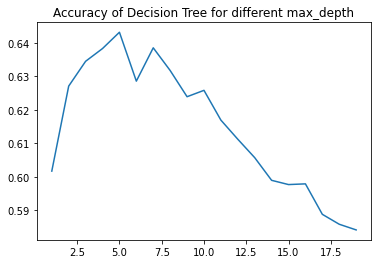

In [1531]:
sns.lineplot(x=[i for i in range(1,20)], y=temp)
plt.title('Accuracy of Decision Tree for different max_depth')

In [1532]:
temp = []
for i in range(1,20):
    rf = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    temp.append(metrics.accuracy_score(y_test, y_pred_rf))
    print('max_depth =',i,':', metrics.accuracy_score(y_test, y_pred_rf))
    

max_depth = 1 : 0.6209745762711865
max_depth = 2 : 0.6328389830508474
max_depth = 3 : 0.6377118644067796
max_depth = 4 : 0.6508474576271186
max_depth = 5 : 0.6538135593220339
max_depth = 6 : 0.6542372881355932
max_depth = 7 : 0.6612288135593221
max_depth = 8 : 0.663135593220339
max_depth = 9 : 0.6648305084745763
max_depth = 10 : 0.6610169491525424
max_depth = 11 : 0.6646186440677966
max_depth = 12 : 0.6601694915254237
max_depth = 13 : 0.6671610169491525
max_depth = 14 : 0.6663135593220338
max_depth = 15 : 0.6705508474576272
max_depth = 16 : 0.6716101694915254
max_depth = 17 : 0.6608050847457627
max_depth = 18 : 0.6639830508474577
max_depth = 19 : 0.6612288135593221


Text(0.5, 1.0, 'Accuracy of Random Forest for different max_depth')

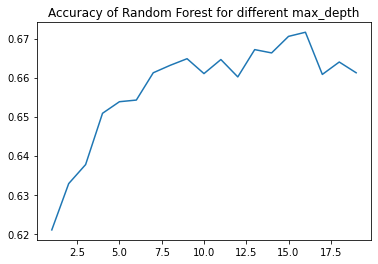

In [1533]:
sns.lineplot(x=[i for i in range(1,20)], y=temp)
plt.title('Accuracy of Random Forest for different max_depth')

In [1534]:
temp = []
for i in range(1,20):
    ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=i)
    ada.fit(X_train, y_train)
    y_pred_ada = ada.predict(X_test)
    temp.append(metrics.accuracy_score(y_test, y_pred_ada))
    print('learning_rate =',i,':', metrics.accuracy_score(y_test, y_pred_ada))

learning_rate = 1 : 0.6665254237288135
learning_rate = 2 : 0.39809322033898303
learning_rate = 3 : 0.3983050847457627
learning_rate = 4 : 0.3983050847457627
learning_rate = 5 : 0.3983050847457627
learning_rate = 6 : 0.3983050847457627
learning_rate = 7 : 0.3983050847457627
learning_rate = 8 : 0.5230932203389831
learning_rate = 9 : 0.47690677966101697
learning_rate = 10 : 0.47690677966101697
learning_rate = 11 : 0.3983050847457627
learning_rate = 12 : 0.3983050847457627
learning_rate = 13 : 0.3983050847457627
learning_rate = 14 : 0.3983050847457627
learning_rate = 15 : 0.3983050847457627
learning_rate = 16 : 0.3983050847457627
learning_rate = 17 : 0.3983050847457627
learning_rate = 18 : 0.4760593220338983
learning_rate = 19 : 0.3983050847457627


Text(0.5, 1.0, 'Accuracy of Ada Boost for different learning_rate')

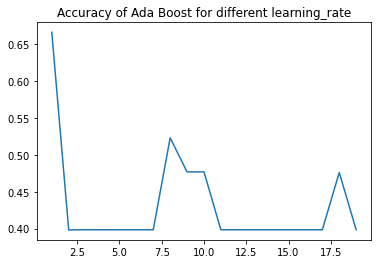

In [1535]:
sns.lineplot(x=[i for i in range(1,20)], y=temp)
plt.title('Accuracy of Ada Boost for different learning_rate')

## Next subset

Dataset of all the datas, with the outliers

In [1536]:
X = data.drop(columns="popularity")
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1537]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_acc.append(metrics.accuracy_score(y_test, y_pred_knn))
print('Knn accuracy :', metrics.accuracy_score(y_test, y_pred_knn))

Knn accuracy : 0.5638892499675029


In [1538]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_acc.append(metrics.accuracy_score(y_test, y_pred_dt))
print('Decision Tree accuracy :', metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree accuracy : 0.588457038866502


In [1539]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_acc.append(metrics.accuracy_score(y_test, y_pred_rf))
print('RandomForest accuracy :', metrics.accuracy_score(y_test, y_pred_rf))

RandomForest accuracy : 0.6266735993760562


In [1540]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

ada_acc.append(metrics.accuracy_score(y_test, y_pred_ada))
print('Ada Boost accuracy :',metrics.accuracy_score(y_test, y_pred_ada))

Ada Boost accuracy : 0.657090861822436


## Next subset

Susbset of variables with high correlation with the target variable

In [1541]:
top_corr=pd.DataFrame(data=data,columns=
['popularity',
'LDA_02',
'kw_avg_avg',
'data_channel_is_world',
'data_channel_is_socmed',
'data_channel_is_entertainment',
'weekday_is_saturday',
'global_subjectivity',
'data_channel_is_tech',
'LDA_04'])

X = top_corr.drop(columns="popularity")
y = top_corr['popularity']

outliers = (X.apply(zscore)<3).all(axis=1)
X = X[outliers]
y = y[outliers]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1542]:
top_corr_knn = KNeighborsClassifier(n_neighbors=3)
top_corr_knn.fit(X_train, y_train)
y_pred_knn = top_corr_knn.predict(X_test)

knn_acc.append(metrics.accuracy_score(y_test, y_pred_knn))
print('Knn accuracy :', metrics.accuracy_score(y_test, y_pred_knn))

Knn accuracy : 0.5579970104633781


In [1543]:
top_corr_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
top_corr_rf.fit(X_train, y_train)
y_pred_rf = top_corr_rf.predict(X_test)

rf_acc.append(metrics.accuracy_score(y_test, y_pred_rf))
print('RandomForest accuracy :', metrics.accuracy_score(y_test, y_pred_rf))

RandomForest accuracy : 0.6152466367713004


In [1544]:
top_corr_dt = DecisionTreeClassifier(random_state=0)
top_corr_dt.fit(X_train, y_train)
y_pred_dt = top_corr_dt.predict(X_test)

dt_acc.append(metrics.accuracy_score(y_test, y_pred_dt))
print('Decision Tree accuracy :', metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree accuracy : 0.5458893871449926


In [1545]:
top_corr_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
top_corr_ada.fit(X_train, y_train)
y_pred_ada = top_corr_ada.predict(X_test)

ada_acc.append(metrics.accuracy_score(y_test, y_pred_ada))
print('Ada Boost accuracy :',metrics.accuracy_score(y_test, y_pred_ada))

Ada Boost accuracy : 0.6183856502242152


## Next subset

In [1546]:
true_continous=pd.DataFrame(data=data,index=data.index,columns=
['n_tokens_content',
'n_unique_tokens',
'n_non_stop_words',
'n_non_stop_unique_tokens',
'num_hrefs',
'num_self_hrefs',
'num_imgs',
'num_videos',
'kw_min_min',
'kw_max_min',
'kw_avg_min',
'kw_min_max',
'kw_max_max',
'kw_max_avg',
'kw_avg_avg',
'self_reference_min_shares',
'self_reference_max_shares',
'self_reference_avg_sharess',
'LDA_00',
'LDA_01',
'LDA_02',
'LDA_03',
'LDA_04',
'global_rate_negative_words',
'min_positive_polarity',
'max_negative_polarity',
'abs_title_sentiment_polarity','popularity'])

X=true_continous.drop(columns="popularity")
y=true_continous['popularity']

outliers = (X.apply(zscore)<3).all(axis=1)
X = X[outliers]
y = y[outliers]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1547]:
true_continous_knn = KNeighborsClassifier(n_neighbors=3)
true_continous_knn.fit(X_train, y_train)
y_pred_knn = true_continous_knn.predict(X_test)

knn_acc.append(metrics.accuracy_score(y_test, y_pred_knn))
print('Knn accuracy :', metrics.accuracy_score(y_test, y_pred_knn))

Knn accuracy : 0.5752508361204013


In [1548]:
true_continous_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
true_continous_rf.fit(X_train, y_train)
y_pred_rf = true_continous_rf.predict(X_test)

rf_acc.append(metrics.accuracy_score(y_test, y_pred_rf))
print('RandomForest accuracy :', metrics.accuracy_score(y_test, y_pred_rf))

RandomForest accuracy : 0.6260551043159739


In [1549]:
true_continous_dt = DecisionTreeClassifier(random_state=0)
true_continous_dt.fit(X_train, y_train)
y_pred_dt = true_continous_dt.predict(X_test)

dt_acc.append(metrics.accuracy_score(y_test, y_pred_dt))
print('Decision Tree accuracy :', metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree accuracy : 0.5674470457079153


In [1550]:
true_continous_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
true_continous_ada.fit(X_train, y_train)
y_pred_ada = true_continous_ada.predict(X_test)

ada_acc.append(metrics.accuracy_score(y_test, y_pred_ada))
print('Ada Boost accuracy :',metrics.accuracy_score(y_test, y_pred_ada))

Ada Boost accuracy : 0.6505813027552158


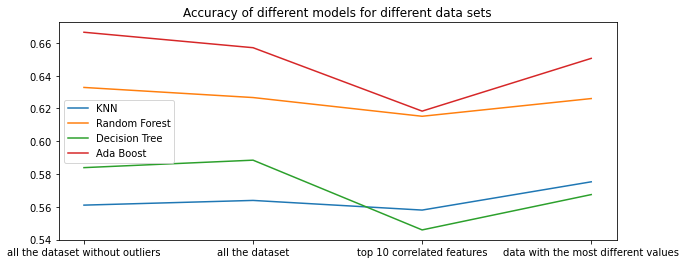

In [1551]:
plt.figure(figsize=(10,4))
arr=['all the dataset without outliers','all the dataset','top 10 correlated features','data with the most different values']
sns.lineplot(x=[i for i in arr], y=knn_acc, label='KNN')
sns.lineplot(x=[i for i in arr], y=rf_acc, label='Random Forest')
sns.lineplot(x=[i for i in arr], y=dt_acc, label='Decision Tree')
sns.lineplot(x=[i for i in arr], y=ada_acc, label='Ada Boost')
plt.title('Accuracy of different models for different data sets')
plt.legend()
